# Data Modeling

In this step, I will take the cleaned data and create a machine learning model to classify. 

In [1]:
# Import the necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../data/processed/language_cleaned.csv")

In [3]:
#Separating Independent and Dependent features
X = data["Text"]
y = data["Language"]

#Label Encoding to convert it into a numerical form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
# Bag of Words
# converting text into numerical form by creating a Bag of Words model using CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # tokenize a collection of text documents
X = cv.fit_transform(X).toarray()
X.shape

(10271, 39404)

In [5]:
#Shape is (10271, 39404)

#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [6]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [7]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [9]:
print("Accuracy is :",ac)

Accuracy is : 0.9795620437956204


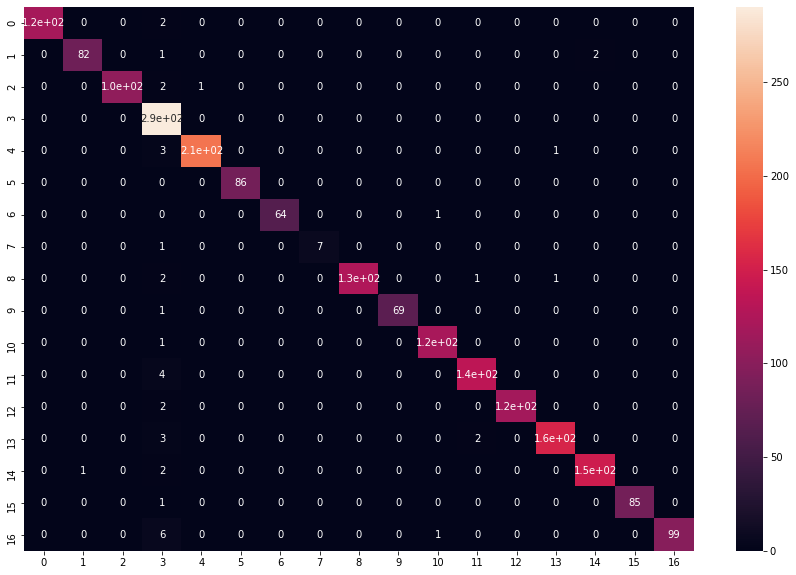

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [11]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [14]:
predict('This is a sentence.')

The langauge is in English


In [15]:
predict('ഇതൊരു വാക്യമാണ്.')

The langauge is in Malayalam


In [16]:
predict('Questa è una frase.')

The langauge is in Italian


In [18]:
predict("'C'est une phrase.")

The langauge is in French


In [23]:
predict("ಇದು ಒಂದು ವಾಕ್ಯ.")

The langauge is in Kannada


In [20]:
# Hungarian, not in database: 
predict("Ez egy mondat")

The langauge is in English
